**Machine Learning Project** 


Instructor: Professor Sundeep Rangan


Team: Viral Dalal(vd2477), Vedant Pradhan(vsp7234), Dhanushkumar(dj2680)

Library and Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier

In [ ]:
train_df = pd.read_csv("/content/dataset.csv")
print(train_df.shape)
print(train_df.describe())
print(train_df.info())

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-n

Data Cleaning

In [ ]:
#checking for any missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
Gender                         0  0.000000
Timestamp                      0  0.000000
Age                            0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
Country                        0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
care_options                   0  0.000000
benefits                       0  0.000000
seek_help                      0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
wellness_program               0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
supervisor                     0  0.000000
coworkers  

In [4]:
#dealing with missing data
train_df.drop(['comments'], axis= 1, inplace=True)
train_df.drop(['state'], axis= 1, inplace=True)
train_df.drop(['Timestamp'], axis= 1, inplace=True)

train_df.isnull().sum().max() #just checking that there's no missing data missing...
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


Cleaning NaN

In [5]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []


for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
gender = train_df['Gender'].unique()
print(gender)

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']


In [ ]:
#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)


stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

/tmp/ipython-input-1389745033.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
/tmp/ipython-input-1389745033.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

['female' 'male' 'trans']


In [8]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

# Fill with media() values < 18 and > 120
s = pd.Series(train_df['Age'])
s[s<18] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>120] = train_df['Age'].median()
train_df['Age'] = s

#Ranges of Age
train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

/tmp/ipython-input-3830636838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)


In [ ]:
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [10]:

train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


#Encoding Data

In [ ]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue

for key, value in labelDict.items():
    print(key, value)

label_Age [np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(60), np.int64(61), np.int64(62), np.int64(65), np.int64(72)]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Mo

In [ ]:
train_df = train_df.drop(['Country'], axis= 1)
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,19,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,26,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,14,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,13,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,13,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Testing there aren't any missing data

In [ ]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
work_interfere                 0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
mental_vs_physical             0      0.0
obs_consequence                0  

Features Scaling: We're going to scale age, because it is extremely different from the other ones.

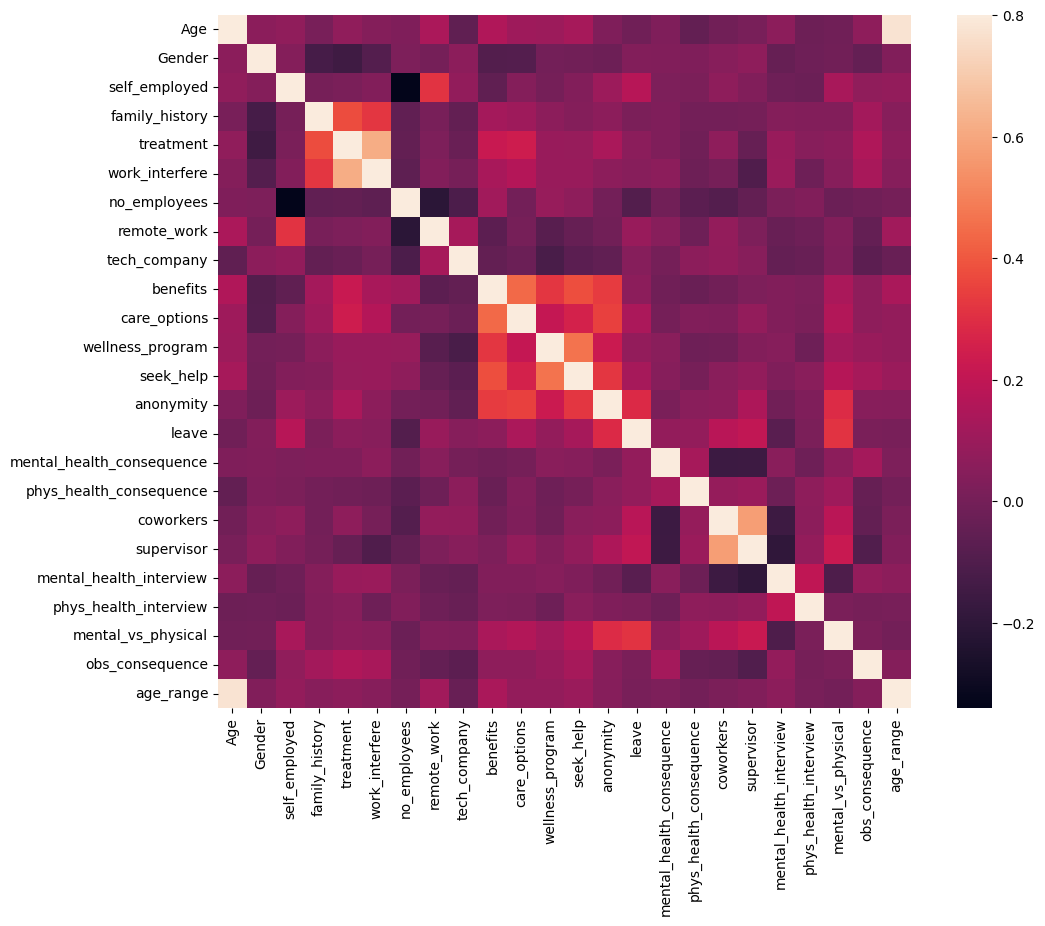

In [ ]:
#Covariance Matrix. Variability comparison between categories of variables
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

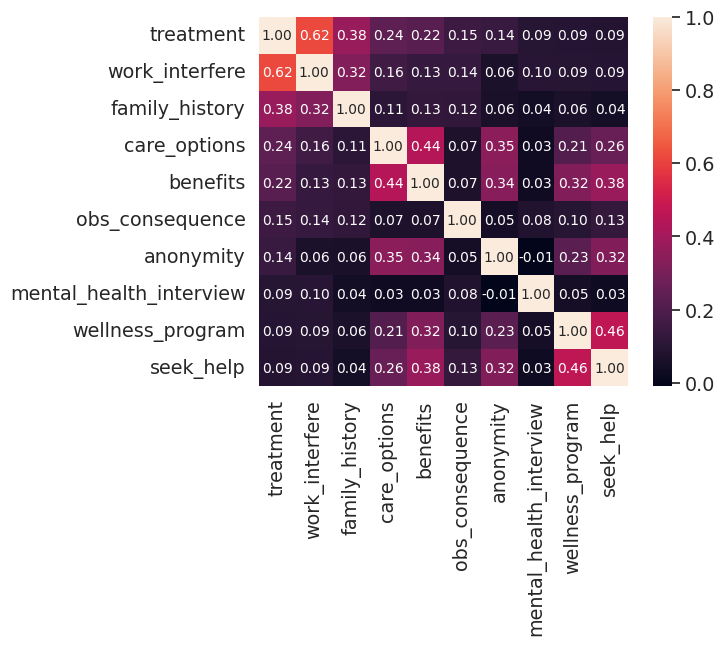

In [ ]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#Some charts to see data relationship

**Distribution** and density by Age

/tmp/ipython-input-3214571484.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df["Age"], bins=24)


Text(0.5, 0, 'Age')

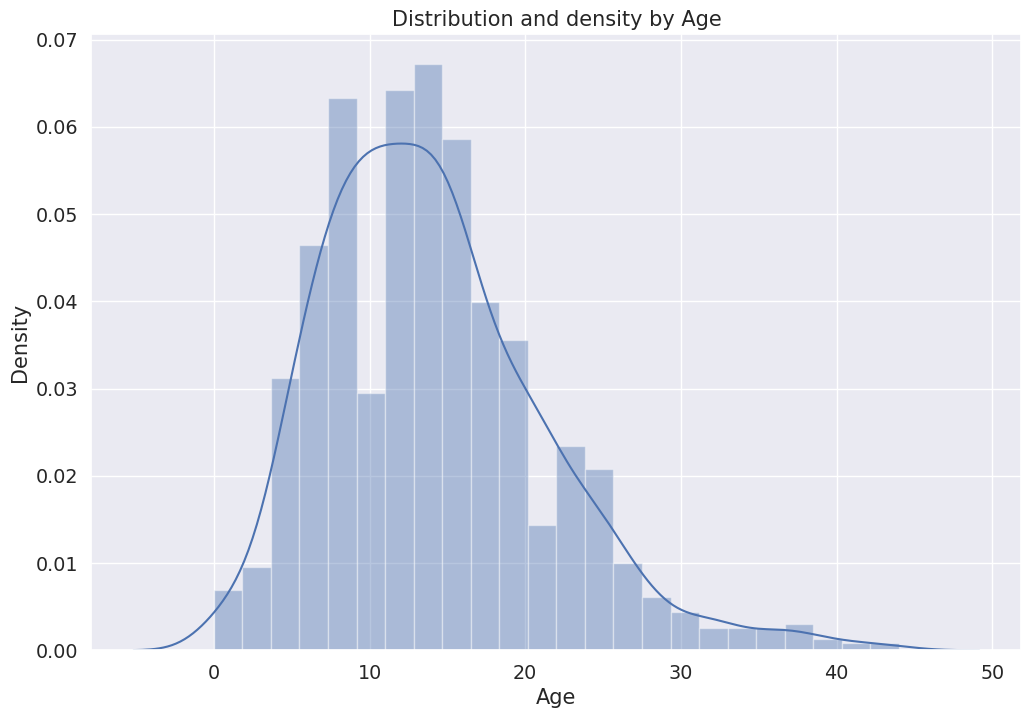

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(train_df["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

Separate by treatment

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


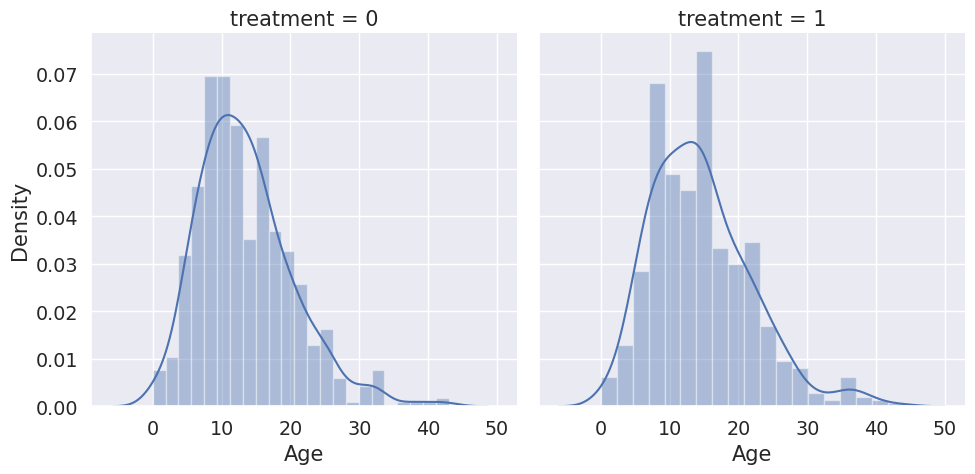

In [ ]:
g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.distplot, "Age")

How many people has been treated?

/tmp/ipython-input-3705428683.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(unique_categories)


Text(0.5, 1.0, 'Total Distribution by treated or not')

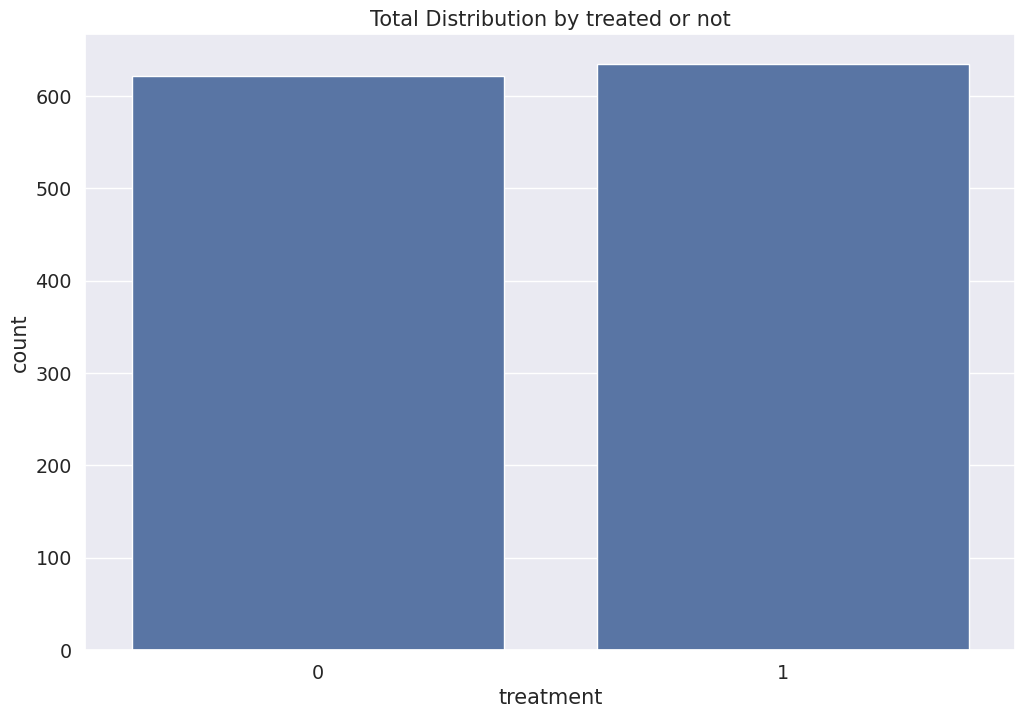

In [18]:
plt.figure(figsize=(12, 8))
# Get unique categories in the 'treatment' column
unique_categories = train_df['treatment'].unique()
# Sort them if necessary
unique_categories.sort()  # This ensures consistent labeling
# Set the tick labels with the unique categories
g = sns.countplot(x="treatment", data=train_df)
g.set_xticklabels(unique_categories)

plt.title('Total Distribution by treated or not')

Nested barplot to show probabilities for class and sex

/tmp/ipython-input-290413407.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)


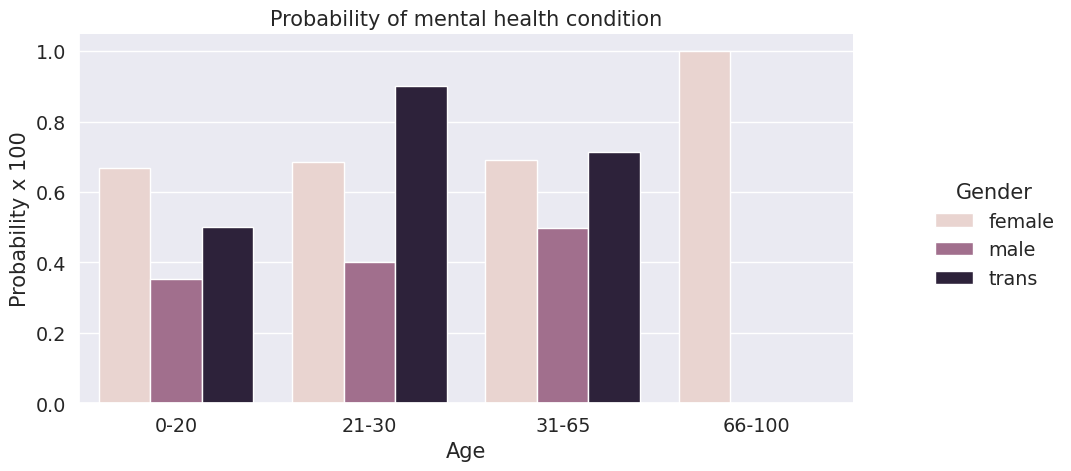

In [ ]:
o = labelDict['label_age_range']

g = sns.catplot(x="age_range", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, height=5, aspect=2, legend_out=True)
g.set_xticklabels(labels=o)

plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Age')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)

plt.show()

Barplot to show probabilities for family history

/tmp/ipython-input-1858939650.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)


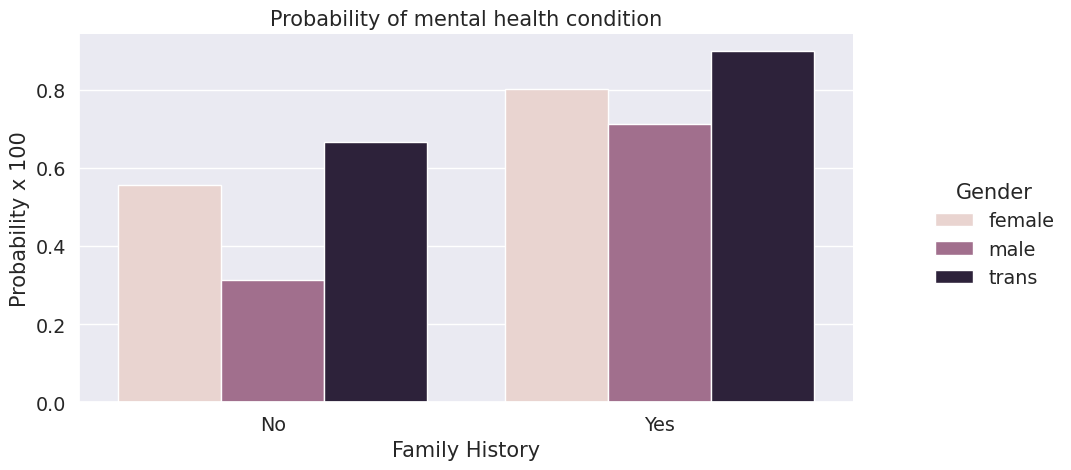

In [20]:
o = labelDict['label_family_history']
g = sns.catplot(x="family_history", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()

Barplot to show probabilities for care options

/tmp/ipython-input-336938269.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)


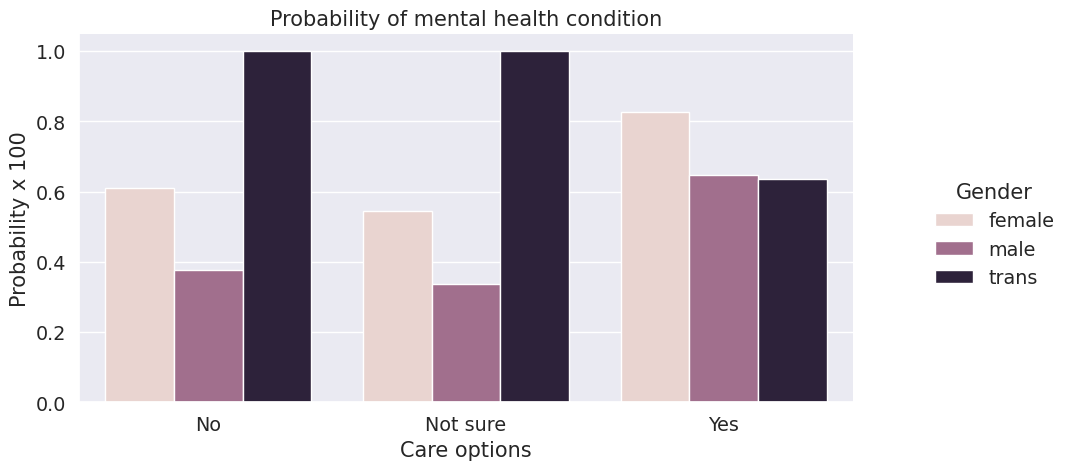

In [21]:
o = labelDict['label_care_options']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for benefits



/tmp/ipython-input-1376532713.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)


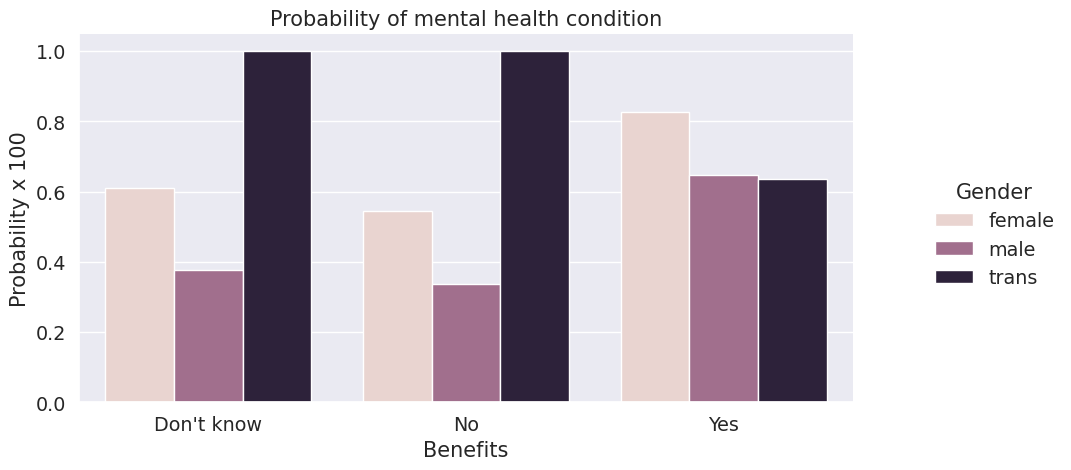

In [22]:
o = labelDict['label_benefits']
g = sns.catplot(x="care_options", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Benefits')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

Barplot to show probabilities for work interfere



/tmp/ipython-input-3263845444.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)


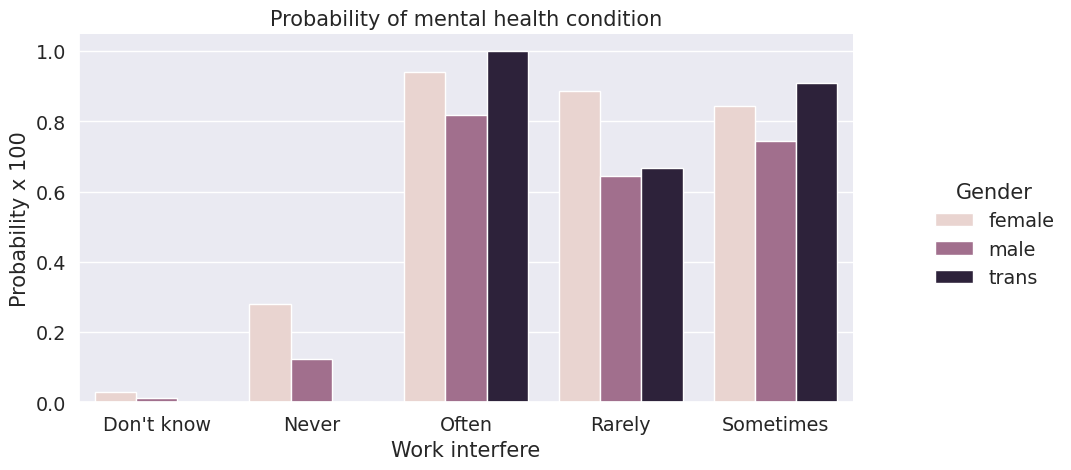

In [23]:
o = labelDict['label_work_interfere']
g = sns.catplot(x="work_interfere", y="treatment", hue="Gender", data=train_df, kind="bar", ci=None, aspect=2, legend_out = True)
g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()

#Scaling and Fitting

Features Scaling We're going to scale age, because is extremely different from the othere ones.



In [24]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.431818,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.590909,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.318182,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.295455,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.295455,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Spilitting Dataset

In [25]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

methodDict = {}
rmseDict = ()

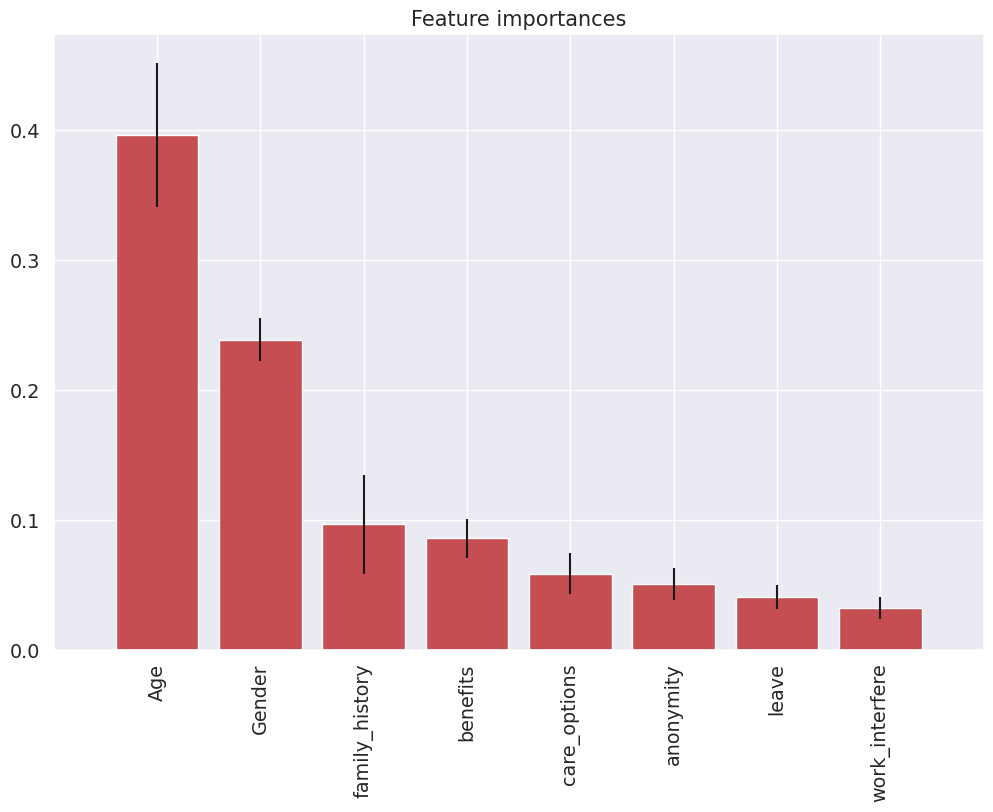

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])

# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

#Tuning

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    #Classification accuracy: percentage of correct predictions
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred_class))
    print('Null accuracy:\n', y_test.value_counts())
    print('Percentage of ones:', y_test.mean())
    print('Percentage of zeros:',1 - y_test.mean())
    print('True:', y_test.values[0:25])
    print('Pred:', y_pred_class[0:25])

    confusion = metrics.confusion_matrix(y_test, y_pred_class)

    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]

    # visualize Confusion Matrix
    sns.heatmap(confusion,annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Classification Accuracy:', accuracy)
    print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    false_positive_rate = FP / float(TN + FP)
    print('False Positive Rate:', false_positive_rate)

    #Precision: When a positive value is predicted, how often is the prediction correct?
    print('Precision:', metrics.precision_score(y_test, y_pred_class))

    # IMPORTANT: first argument is true values, second argument is predicted probabilities
    print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

    # calculate cross-validated AUC
    print('Cross-validated AUC:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())
    print('First 10 predicted responses:\n', model.predict(X_test)[0:10])
    print('First 10 predicted probabilities of class members:\n', model.predict_proba(X_test)[0:10])
    model.predict_proba(X_test)[0:10, 1]

    # store the predicted probabilities for class 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot == True:
        # histogram of predicted probabilities
        plt.rcParams['font.size'] = 12
        plt.hist(y_pred_prob, bins=8)

        # x-axis limit from 0 to 1
        plt.xlim(0,1)
        plt.title('Histogram of predicted probabilities')
        plt.xlabel('Predicted probability of treatment')
        plt.ylabel('Frequency')

    y_pred_prob = y_pred_prob.reshape(-1,1)
    # Binarize predicted probabilities using threshold
    y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)
    print('First 10 predicted probabilities:\n', y_pred_prob[0:10])
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot == True:
        plt.figure()

        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.rcParams['font.size'] = 12
        plt.title('ROC curve for treatment classifier')
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.legend(loc="lower right")
        plt.show()

    # gpt thankyou
    def evaluate_threshold(threshold):

        print('Specificity for ' + str(threshold) + ' :', 1 - fpr[thresholds > threshold][-1])
    predict_mine = np.where(y_pred_prob > 0.50, 1, 0)
    confusion = metrics.confusion_matrix(y_test, predict_mine)
    print(confusion)
    return accuracy

Tuning with cross validation score

In [28]:
def tuningCV(knn):

    # search for an optimal value of K for KNN
    k_range = list(range(1, 31))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    # plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

Tuning with GridSearchCV

In [29]:
def tuningGridSerach(knn):
    #More efficient parameter tuning using GridSearchCV
    k_range = list(range(1, 31))
    print(k_range)

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

    # fit the grid with data
    grid.fit(X, y)

    grid.grid_scores_

    print(grid.grid_scores_[0].parameters)
    print(grid.grid_scores_[0].cv_validation_scores)
    print(grid.grid_scores_[0].mean_validation_score)

    grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
    print(grid_mean_scores)

    # plot the results
    plt.plot(k_range, grid_mean_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()
    print('GridSearch best score', grid.best_score_)
    print('GridSearch best params', grid.best_params_)
    print('GridSearch best estimator', grid.best_estimator_)

Tuning with RandomizedSearchCV

In [30]:
def tuningRandomizedSearchCV(model, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)
    rand.cv_results_

    # examine the best model
    print('Rand. Best Score: ', rand.best_score_)
    print('Rand. Best Params: ', rand.best_params_)

    # run RandomizedSearchCV 20 times (with n_iter=10) and record the best score
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))
    print(best_scores)

Tuning with searching multiple parameters simultaneously

In [31]:
def tuningMultParam(knn):

    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    # create a parameter grid: map the parameter names to the values that should be searched
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print(param_grid)

    # instantiate and fit the grid
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
    grid.fit(X, y)

    # view the complete results
    print(grid.grid_scores_)

    # examine the best model
    print('Multiparam. Best Score: ', grid.best_score_)
    print('Multiparam. Best Params: ', grid.best_params_)

#Evaluating models

Logistic Regression

In [ ]:
def logisticRegression():

    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    y_pred_class = logreg.predict(X_test)
    accuracy_score = evalClassModel(logreg, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Log. Regression'] = accuracy_score * 100

In [33]:
X_train

,Age,Gender,family_history,benefits,care_options,anonymity,leave,work_interfere
929,0.295455,1,1,0,0,0,4,1
901,0.568182,1,1,1,0,0,3,3
579,0.363636,1,1,2,0,0,0,4
367,0.409091,1,1,1,2,2,4,2
615,0.272727,1,0,1,1,0,1,2
...,...,...,...,...,...,...,...,...
763,0.454545,1,1,1,0,1,3,4
835,0.590909,1,1,0,0,0,1,4
1218,0.227273,1,0,1,1,0,2,0
559,0.136364,1,0,0,1,0,0,0


Accuracy: 0.7936507936507936
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


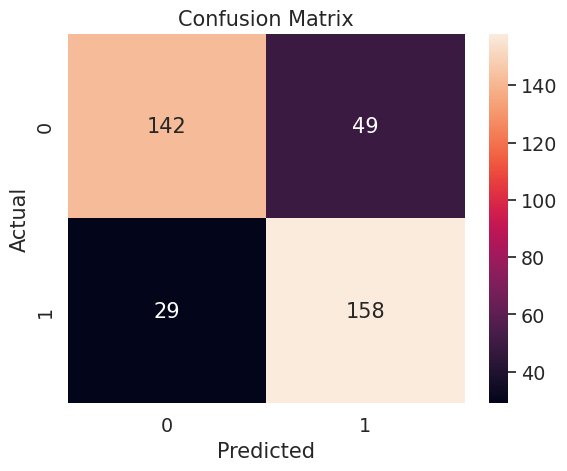

Classification Accuracy: 0.7936507936507936
Classification Error: 0.2063492063492064
False Positive Rate: 0.25654450261780104
Precision: 0.7632850241545893
AUC Score: 0.794187641739228
Cross-validated AUC: 0.8753371866593114
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 0 1]
First 10 predicted probabilities of class members:
 [[0.09192784 0.90807216]
 [0.95998457 0.04001543]
 [0.96552072 0.03447928]
 [0.78739197 0.21260803]
 [0.38947126 0.61052874]
 [0.05256967 0.94743033]
 [0.75023269 0.24976731]
 [0.19037376 0.80962624]
 [0.61623206 0.38376794]
 [0.4769296  0.5230704 ]]
First 10 predicted probabilities:
 [[0.90807216]
 [0.04001543]
 [0.03447928]
 [0.21260803]
 [0.61052874]
 [0.94743033]
 [0.24976731]
 [0.80962624]
 [0.38376794]
 [0.5230704 ]]


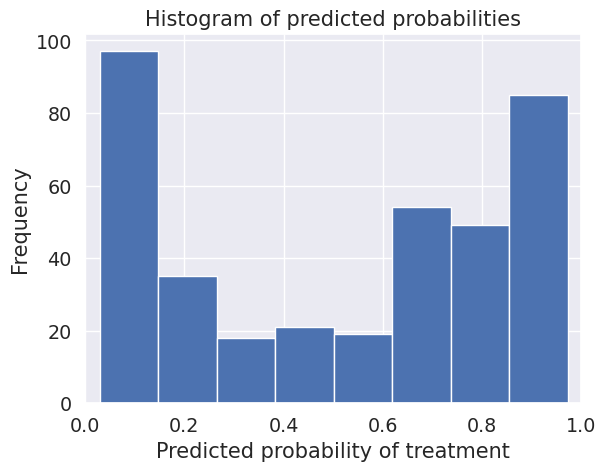

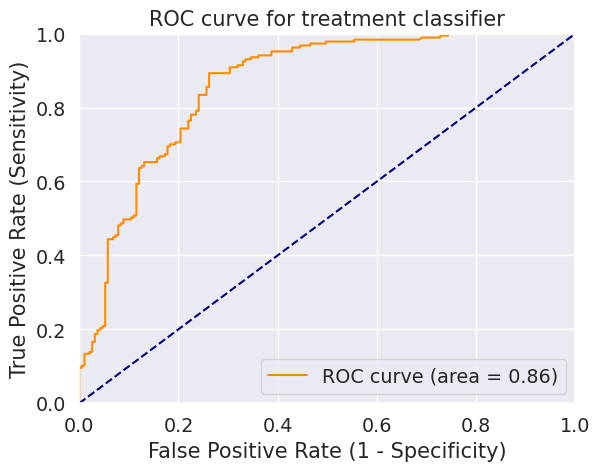

[[142  49]
 [ 29 158]]


In [34]:
logisticRegression()

KNeighbors Classifier

In [35]:
def Knn():

    knn = KNeighborsClassifier(n_neighbors=5)

    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']

    param_dist = dict(n_neighbors=k_range, weights=weight_options)
    tuningRandomizedSearchCV(knn, param_dist)

    knn = KNeighborsClassifier(n_neighbors=27, weights='uniform')
    knn.fit(X_train, y_train)

    y_pred_class = knn.predict(X_test)

    accuracy_score = evalClassModel(knn, y_test, y_pred_class, True)
    methodDict['K-Neighbors'] = accuracy_score * 100

Rand. Best Score:  0.8201841269841269
Rand. Best Params:  {'weights': 'uniform', 'n_neighbors': 15}
[np.float64(0.815), np.float64(0.818), np.float64(0.815), np.float64(0.822), np.float64(0.818), np.float64(0.819), np.float64(0.815), np.float64(0.819), np.float64(0.816), np.float64(0.82), np.float64(0.819), np.float64(0.815), np.float64(0.822), np.float64(0.823), np.float64(0.819), np.float64(0.823), np.float64(0.82), np.float64(0.822), np.float64(0.823), np.float64(0.82)]
Accuracy: 0.798941798941799
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


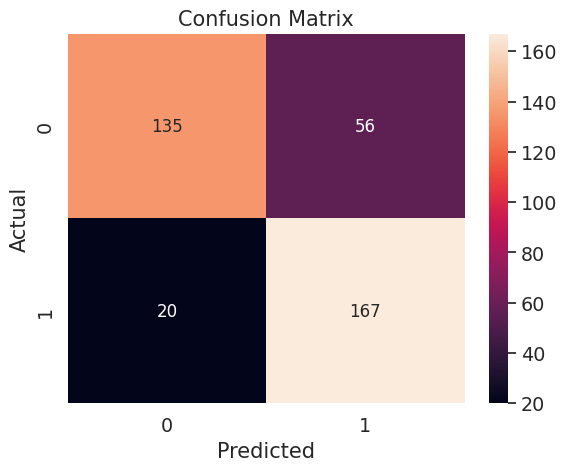

Classification Accuracy: 0.798941798941799
Classification Error: 0.20105820105820105
False Positive Rate: 0.2931937172774869
Precision: 0.7488789237668162
AUC Score: 0.7999272055323796
Cross-validated AUC: 0.8784682568890758
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.37037037 0.62962963]
 [0.03703704 0.96296296]
 [0.59259259 0.40740741]
 [0.37037037 0.62962963]
 [0.33333333 0.66666667]
 [0.33333333 0.66666667]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.62962963]
 [0.96296296]
 [0.40740741]
 [0.62962963]
 [0.66666667]
 [0.66666667]]


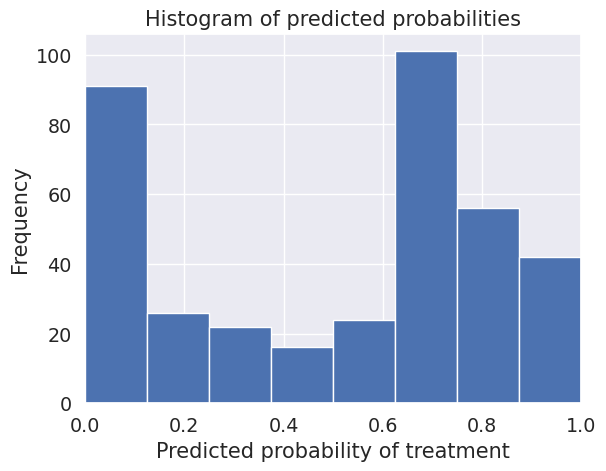

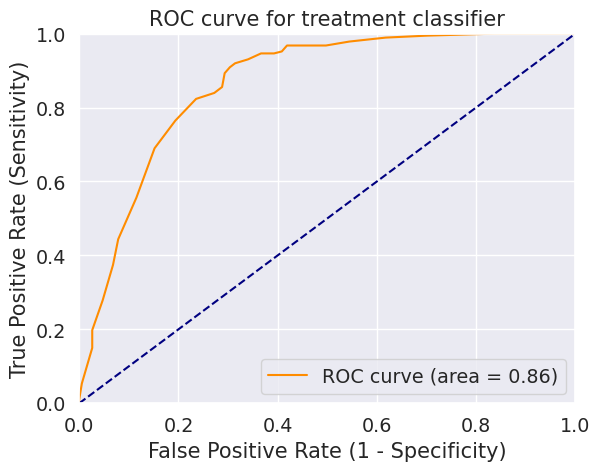

[[135  56]
 [ 20 167]]


In [36]:
Knn()

Decision Tree classifier

In [37]:
def treeClassifier():
    tree = DecisionTreeClassifier()
    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(tree, param_dist)
    tree = DecisionTreeClassifier(max_depth=3, min_samples_split=8, max_features=6, criterion='entropy', min_samples_leaf=7)
    tree.fit(X_train, y_train)
    y_pred_class = tree.predict(X_test)
    accuracy_score = evalClassModel(tree, y_test, y_pred_class, True)
    methodDict['Decision Tree Classifier'] = accuracy_score * 100

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.829), np.float64(0.831), np.float64(0.83), np.float64(0.831), np.float64(0.826), np.float64(0.831), np.float64(0.831), np.float64(0.829), np.float64(0.831), np.float64(0.823), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.828), np.float64(0.829), np.float64(0.831), np.float64(0.819)]
Accuracy: 0.8068783068783069
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


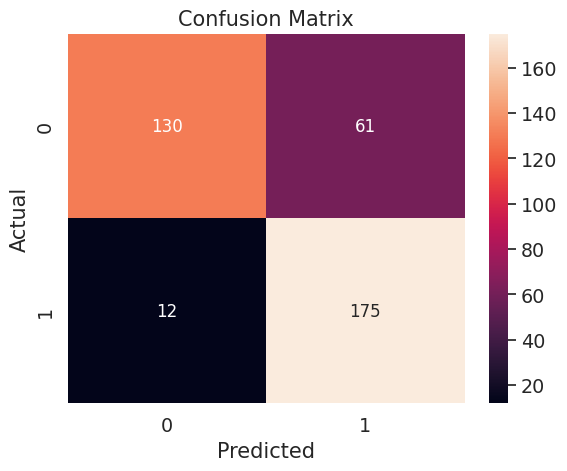

Classification Accuracy: 0.8068783068783069
Classification Error: 0.19312169312169314
False Positive Rate: 0.3193717277486911
Precision: 0.7415254237288136
AUC Score: 0.8082285746283282
Cross-validated AUC: 0.881215264443591
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.18       0.82      ]
 [0.99375    0.00625   ]
 [0.99375    0.00625   ]
 [0.88135593 0.11864407]
 [0.36969697 0.63030303]
 [0.18       0.82      ]
 [0.88135593 0.11864407]
 [0.36969697 0.63030303]
 [0.20430108 0.79569892]
 [0.20430108 0.79569892]]
First 10 predicted probabilities:
 [[0.82      ]
 [0.00625   ]
 [0.00625   ]
 [0.11864407]
 [0.63030303]
 [0.82      ]
 [0.11864407]
 [0.63030303]
 [0.79569892]
 [0.79569892]]


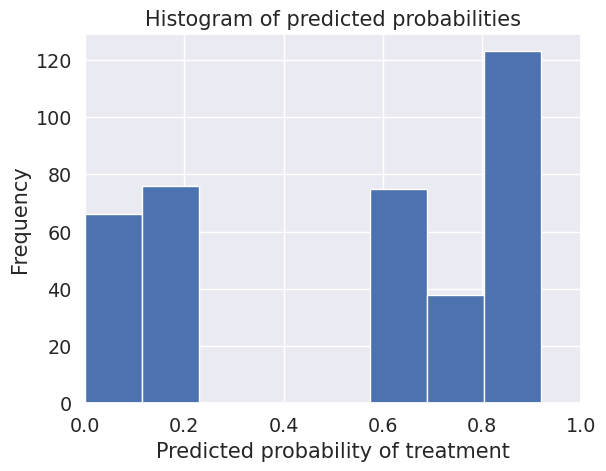

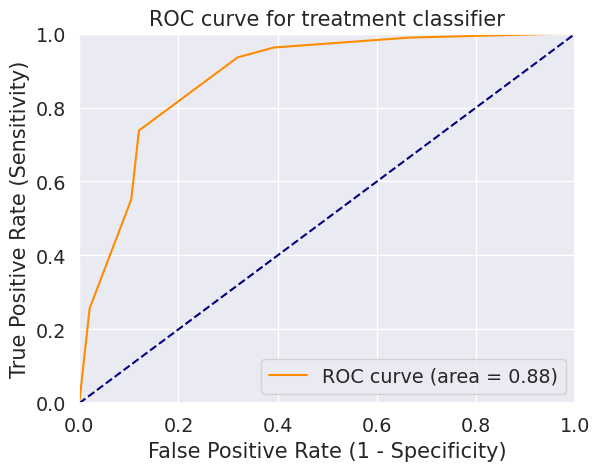

[[130  61]
 [ 12 175]]


In [38]:
treeClassifier()

Random Forests

In [39]:
def randomForest():
    # Calculating the best parameters
    forest = RandomForestClassifier(n_estimators = 20)

    featuresSize = feature_cols.__len__()
    param_dist = {"max_depth": [3, None],
              "max_features": randint(1, featuresSize),
              "min_samples_split": randint(2, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
    tuningRandomizedSearchCV(forest, param_dist)

    # Building and fitting my_forest
    forest = RandomForestClassifier(max_depth = None, min_samples_leaf=8, min_samples_split=2, n_estimators = 20, random_state = 1)
    my_forest = forest.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = my_forest.predict(X_test)

    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Random Forest'] = accuracy_score * 100

Rand. Best Score:  0.8305206349206349
Rand. Best Params:  {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
[np.float64(0.832), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.834), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.831), np.float64(0.833), np.float64(0.831), np.float64(0.832), np.float64(0.832), np.float64(0.835), np.float64(0.831)]
Accuracy: 0.8121693121693122
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


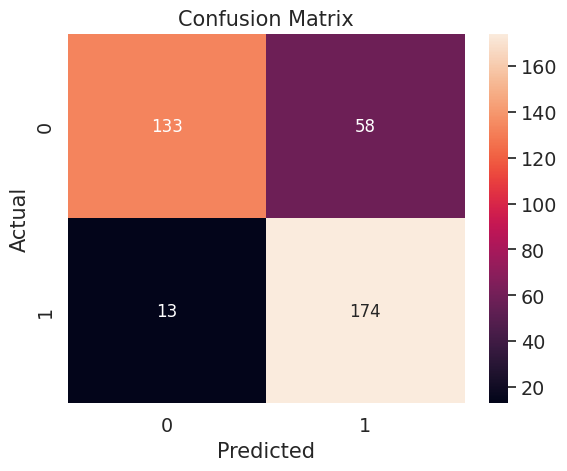

Classification Accuracy: 0.8121693121693122
Classification Error: 0.1878306878306878
False Positive Rate: 0.3036649214659686
Precision: 0.75
AUC Score: 0.8134081809782457
Cross-validated AUC: 0.8934280651104528
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.2555794  0.7444206 ]
 [0.95069083 0.04930917]
 [0.93851009 0.06148991]
 [0.87096597 0.12903403]
 [0.40653554 0.59346446]
 [0.17282958 0.82717042]
 [0.89450448 0.10549552]
 [0.4065912  0.5934088 ]
 [0.20540631 0.79459369]
 [0.19337644 0.80662356]]
First 10 predicted probabilities:
 [[0.7444206 ]
 [0.04930917]
 [0.06148991]
 [0.12903403]
 [0.59346446]
 [0.82717042]
 [0.10549552]
 [0.5934088 ]
 [0.79459369]
 [0.80662356]]


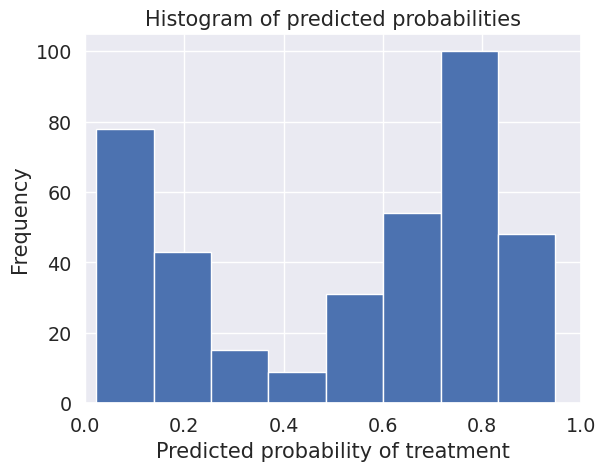

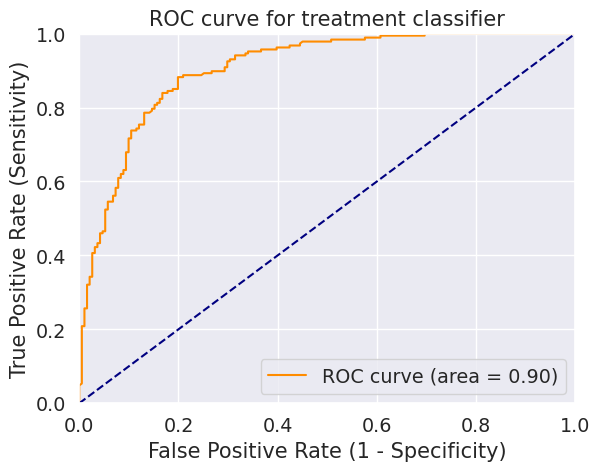

[[133  58]
 [ 13 174]]


In [40]:
randomForest()

Bagging

In [41]:
def bagging():
    # Building and fitting
    bag = BaggingClassifier(DecisionTreeClassifier(), max_samples=1.0, max_features=1.0, bootstrap_features=False)
    bag.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = bag.predict(X_test)

    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Bagging'] = accuracy_score * 100

Accuracy: 0.783068783068783
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0]


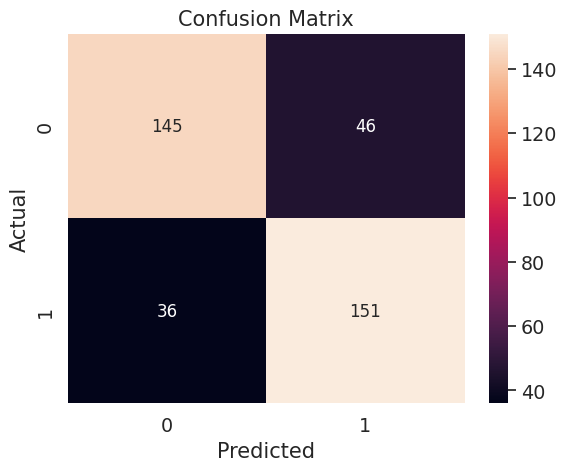

Classification Accuracy: 0.783068783068783
Classification Error: 0.21693121693121697
False Positive Rate: 0.24083769633507854
Precision: 0.766497461928934
AUC Score: 0.7833244673404821
Cross-validated AUC: 0.8543754927299474
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.33333333 0.66666667]
 [1.         0.        ]
 [1.         0.        ]
 [0.9        0.1       ]
 [1.         0.        ]
 [0.1        0.9       ]
 [1.         0.        ]
 [0.6        0.4       ]
 [0.         1.        ]
 [0.         1.        ]]
First 10 predicted probabilities:
 [[0.66666667]
 [0.        ]
 [0.        ]
 [0.1       ]
 [0.        ]
 [0.9       ]
 [0.        ]
 [0.4       ]
 [1.        ]
 [1.        ]]


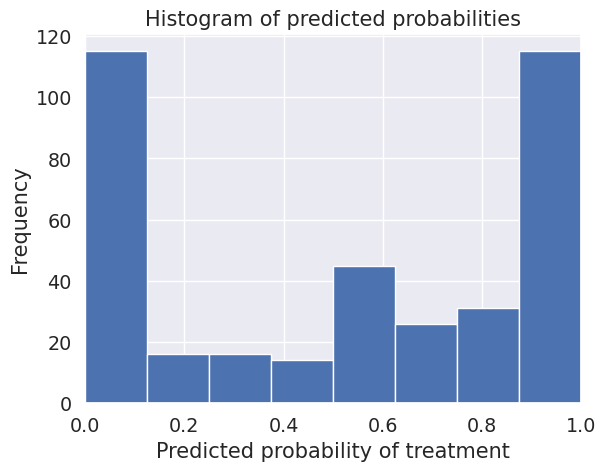

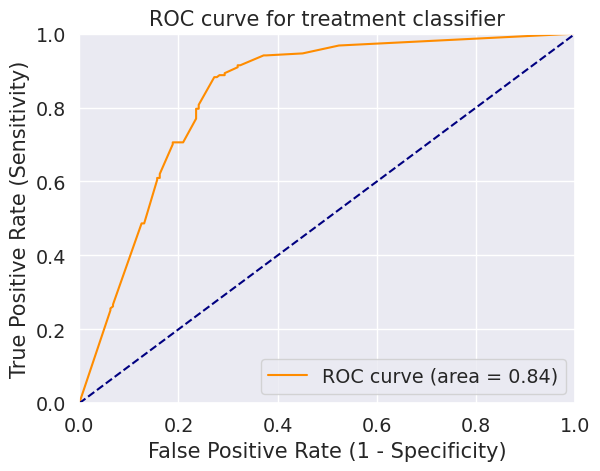

[[145  46]
 [ 36 151]]


In [42]:
bagging()

Boosting

In [45]:
def boosting():
    # Building and fitting
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500)
    boost.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = boost.predict(X_test)

    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['Boosting'] = accuracy_score * 100

Accuracy: 0.8095238095238095
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0]


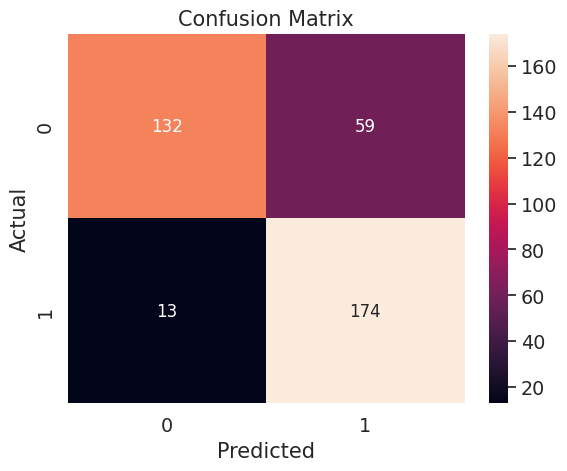

Classification Accuracy: 0.8095238095238095
Classification Error: 0.19047619047619047
False Positive Rate: 0.3089005235602094
Precision: 0.7467811158798283
AUC Score: 0.8107903799311253
Cross-validated AUC: 0.896802760456034
First 10 predicted responses:
 [1 0 0 0 1 1 0 1 1 1]
First 10 predicted probabilities of class members:
 [[0.43487785 0.56512215]
 [0.7396404  0.2603596 ]
 [0.73829669 0.26170331]
 [0.5921301  0.4078699 ]
 [0.49341802 0.50658198]
 [0.37337578 0.62662422]
 [0.5591953  0.4408047 ]
 [0.46083991 0.53916009]
 [0.43395372 0.56604628]
 [0.40128902 0.59871098]]
First 10 predicted probabilities:
 [[0.56512215]
 [0.2603596 ]
 [0.26170331]
 [0.4078699 ]
 [0.50658198]
 [0.62662422]
 [0.4408047 ]
 [0.53916009]
 [0.56604628]
 [0.59871098]]


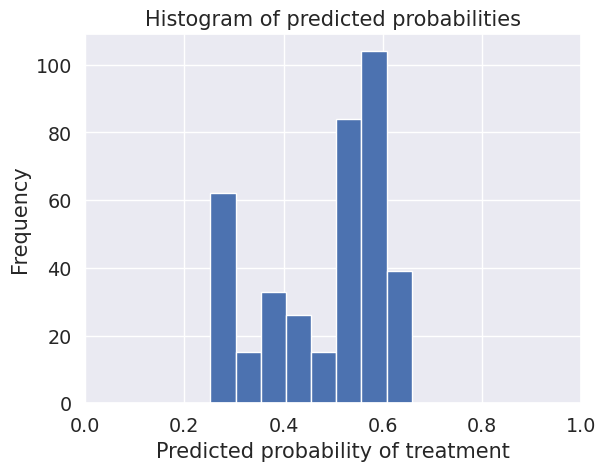

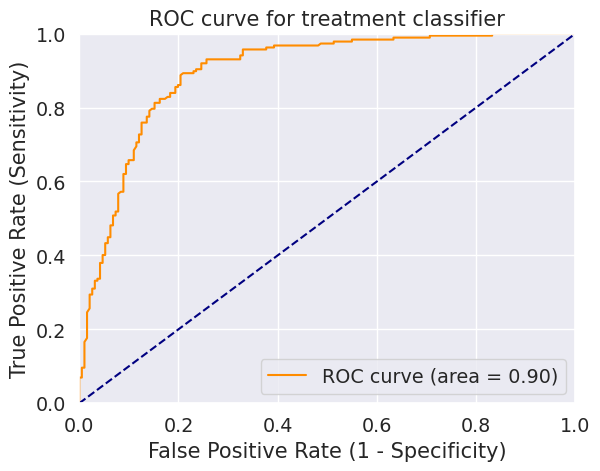

[[132  59]
 [ 13 174]]


In [46]:
boosting()

Stacking

In [47]:
def stacking():
    # Building and fitting
    clf1 = KNeighborsClassifier(n_neighbors=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    lr = LogisticRegression()
    stack = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
    stack.fit(X_train, y_train)

    # make class predictions for the testing set
    y_pred_class = stack.predict(X_test)

    accuracy_score = evalClassModel(stack, y_test, y_pred_class, True)

    #Data for final graph
    methodDict['Stacking'] = accuracy_score * 100

Accuracy: 0.8227513227513228
Null accuracy:
 treatment
0    191
1    187
Name: count, dtype: int64
Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053
True: [0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0]
Pred: [1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0]


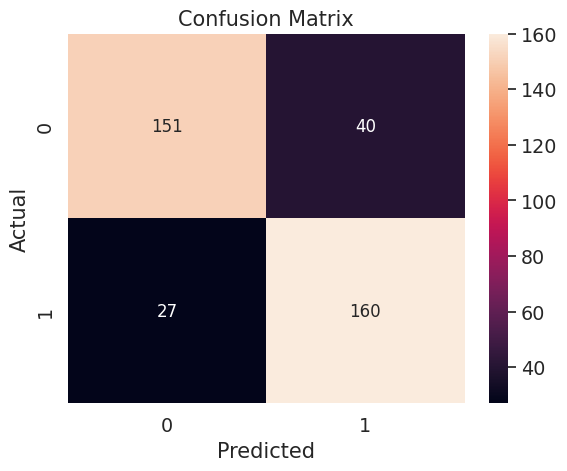

Classification Accuracy: 0.8227513227513228
Classification Error: 0.1772486772486772
False Positive Rate: 0.2094240837696335
Precision: 0.8
AUC Score: 0.8230954447461992


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_scorer.py", line 90, in _cached_call
    result, _ = _get_response_values(
                ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_response.py", line 235, in _get_response_values
    raise ValueError(
ValueError: StackingClassifier should either be a classifier to be used with response_method=decision_function or the response_method should be '

Cross-validated AUC: nan
First 10 predicted responses:
 [1 0 0 0 0 1 0 0 1 1]
First 10 predicted probabilities of class members:
 [[0.01363145 0.98636855]
 [0.98925778 0.01074222]
 [0.98925778 0.01074222]
 [0.98925778 0.01074222]
 [0.98925778 0.01074222]
 [0.01363145 0.98636855]
 [0.98925778 0.01074222]
 [0.97105396 0.02894604]
 [0.03655046 0.96344954]
 [0.01363145 0.98636855]]
First 10 predicted probabilities:
 [[0.98636855]
 [0.01074222]
 [0.01074222]
 [0.01074222]
 [0.01074222]
 [0.98636855]
 [0.01074222]
 [0.02894604]
 [0.96344954]
 [0.98636855]]


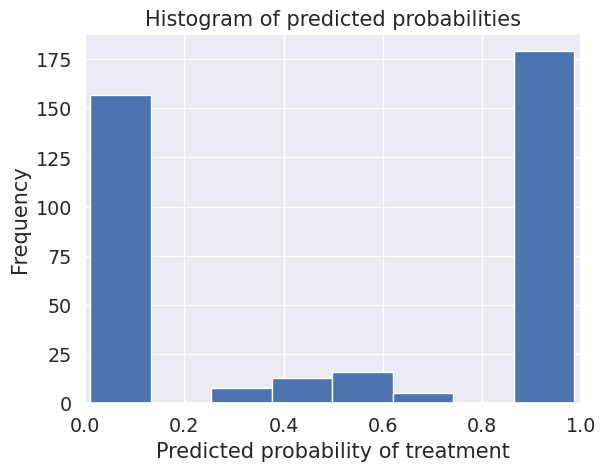

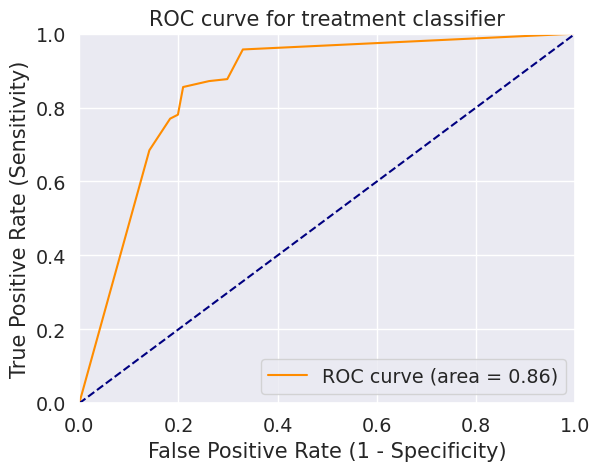

[[151  40]
 [ 27 160]]


In [48]:
stacking()

#Predicting with Neural Network

Create input function

In [ ]:
import tensorflow as tf
import argparse

In [50]:
print(tf.__version__)

2.19.0


In [51]:
batch_size = 100
train_steps = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """An input function for training"""
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle, repeat, and batch the examples.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """An input function for evaluation or prediction"""
    features=dict(features)
    if labels is None:
        # No labels, use only features.
        inputs = features
    else:
        inputs = (features, labels)

    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Batch the examples
    assert batch_size is not None, "batch_size must not be None"
    dataset = dataset.batch(batch_size)

    # Return the dataset.
    return dataset

Define the feature columns

In [52]:
# Define Tensorflow feature columns
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
leave = tf.feature_column.numeric_column("leave")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, leave, work_interfere]

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instantiate an Estimator

In [54]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics

# Define the DNN model
def build_dnn_model(input_shape):
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),
        layers.Dense(10, activation='relu'),
        layers.Dense(10, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Build model
input_shape = X_train.shape[1:]  # Number of features
model = build_dnn_model(input_shape)

# Compile model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.1),
    loss=losses.BinaryCrossentropy(),
    metrics=[metrics.BinaryAccuracy(), metrics.AUC()]
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,           # You can change this
    batch_size=batch_size,
    verbose=1
)

# Evaluate model on test data
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test AUC: {test_auc:.2f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 286ms/step - auc: 0.6457 - binary_accuracy: 0.6270 - loss: 0.6280 - val_auc: 0.8577 - val_binary_accuracy: 0.7910 - val_loss: 0.4667
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.8770 - binary_accuracy: 0.8282 - loss: 0.4089 - val_auc: 0.8798 - val_binary_accuracy: 0.7804 - val_loss: 0.4740
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.8708 - binary_accuracy: 0.8142 - loss: 0.4255 - val_auc: 0.8789 - val_binary_accuracy: 0.8016 - val_loss: 0.4674
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - auc: 0.8939 - binary_accuracy: 0.8421 - loss: 0.3879 - val_auc: 0.8806 - val_binary_accuracy: 0.8254 - val_loss: 0.4419
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.8919 - binary_accuracy: 0.8388 - loss: 0.3900 - val_auc: 0.8809 - val_binary_accuracy: 0.7884 - val_loss: 0.4462
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - auc: 0.8837 - binary_accuracy: 0.8084 - loss: 0.4084 - val_auc: 0.8740 - val_binary_accuracy:

Evaluate the model

In [ ]:
# Evaluate the model and return a dictionary
eval_result = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1, return_dict=True)

# Extract binary accuracy
accuracy = eval_result['binary_accuracy']
print(f"\nTest set accuracy: {accuracy:0.2f}\n")

# Store for final graph
methodDict['Neural Network'] = accuracy * 100

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - auc: 0.8813 - binary_accuracy: 0.8048 - loss: 0.4421

Test set accuracy: 0.81



Making predictions (inferring) from the trained model

In [ ]:
# Predict using the Keras model
predictions = model.predict(X_train, batch_size=batch_size)

# If you want class labels (0 or 1) for binary classification
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Example: first 10 predictions
print(predicted_classes[:10])

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
[0 1 1 1 1 1 1 1 0 1]


In [ ]:
import pandas as pd
import numpy as np

# Predict probabilities
predictions = model.predict(X_train, batch_size=batch_size)

# Convert probabilities to class labels (0 or 1)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Create DataFrame with results
results = pd.DataFrame({
    'index': X_train.index,
    'prediction': predicted_classes,
    'expected': y_train
})

results.head()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


,index,prediction,expected
929,929,0,0
901,901,1,1
579,579,1,1
367,367,1,1
615,615,1,1


Success method plot

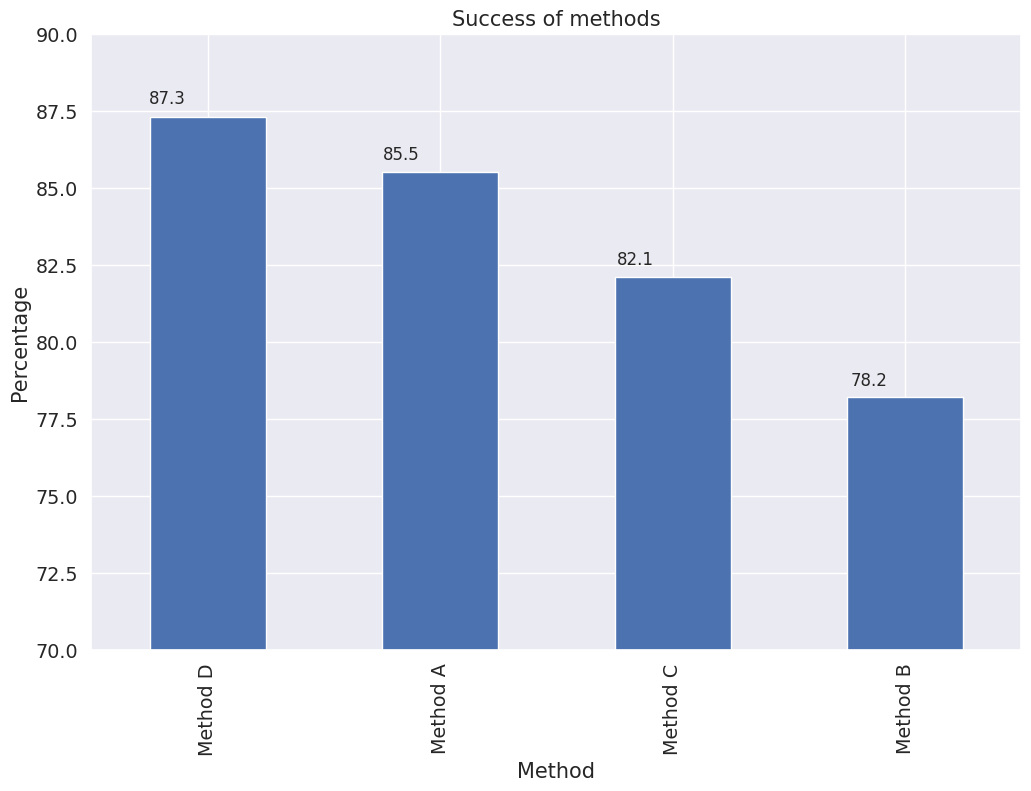

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample methodDict for demonstration purposes
methodDict = {
    'Method A': 85.5,
    'Method B': 78.2,
    'Method C': 82.1,
    'Method D': 87.3
}

def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))

    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    # Save the plot as an image file
    plt.savefig('success_of_methods.png', bbox_inches='tight')

    plt.show()

# Call the function to generate and save the plot
plotSuccess()

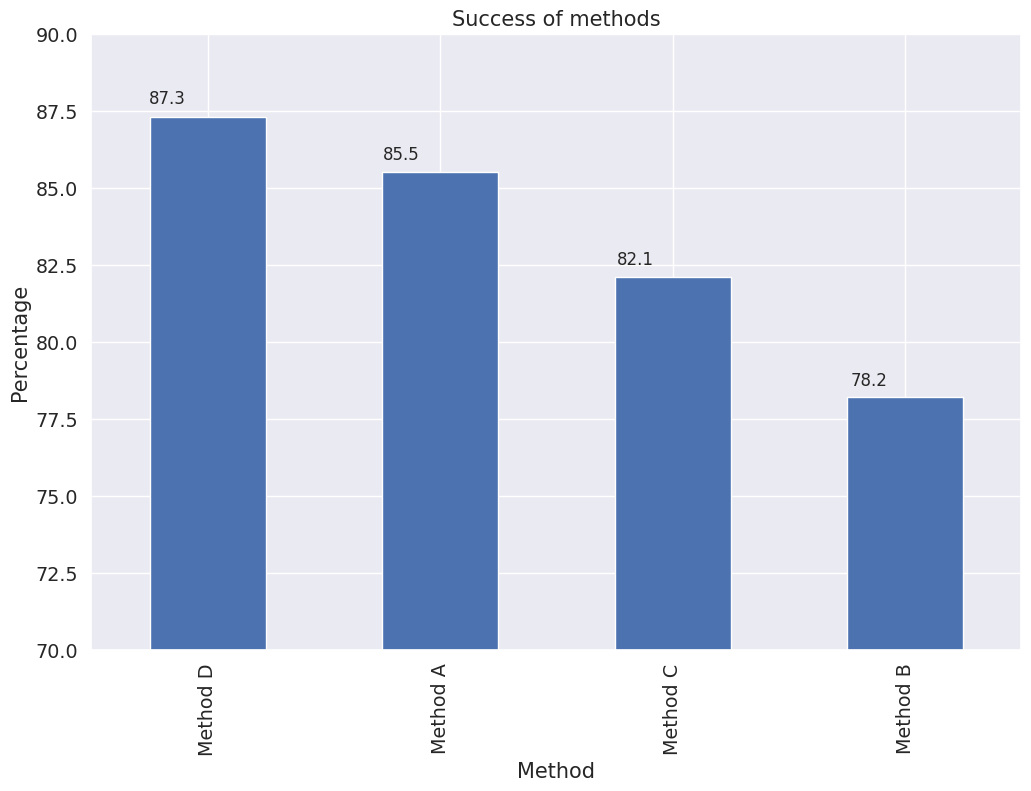

In [67]:
plotSuccess()

Creating predictions on test set

In [68]:
# Generate predictions with the best method i.e. adaboost
clf = AdaBoostClassifier()
clf.fit(X, y)
dfTestPredictions = clf.predict(X_test)
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results.to_csv('results.csv', index=False)
results.head()

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0


In [70]:
!pip install --upgrade sklearn-porter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.4/144.4 kB 9.4 MB/s eta 0:00:00


In [ ]:
!pip install m2cgen

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 5.9 MB/s eta 0:00:00


In [ ]:
import os
print(os.listdir())

['.config', 'results.csv', 'survey.csv', 'success_of_methods.png', 'sample_data']


In [76]:
from sklearn.ensemble import AdaBoostClassifier
import joblib

# Example: train your AdaBoost model
clf = AdaBoostClassifier(n_estimators=500)
clf.fit(X_train, y_train)

# Save it
joblib.dump(clf, 'adaboost_model.pkl')


['adaboost_model.pkl']

In [77]:
clf = joblib.load('adaboost_model.pkl')


In [ ]:
import numpy as np

# Assume clf is your trained AdaBoostClassifier
# X_new is a NumPy array or DataFrame with new input features

def adaboost_predict(clf, X_new):
    """
    Manually compute AdaBoost predictions using the trained model's estimators and weights.
    """
    # Initialize array to accumulate weighted predictions
    weighted_preds = np.zeros(X_new.shape[0])

    # Loop through each base estimator and its weight
    for weight, estimator in zip(clf.estimator_weights_, clf.estimators_):
        # Each estimator predicts 0 or 1
        preds = estimator.predict(X_new)
        # Convert 0 -> -1, 1 -> 1 for AdaBoost sum
        preds_signed = 2*preds - 1
        weighted_preds += weight * preds_signed

    # Final prediction: sign of weighted sum
    final_preds = (weighted_preds > 0).astype(int)
    return final_preds

# Example usage on training or test data
X_data = X_test  # or X_train
predictions = adaboost_predict(clf, X_data)

# Optional: view first 10 predictions
print(predictions[:10])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: U

[1 0 0 0 1 1 0 1 1 1]


#Submission

In [80]:
import pickle
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X, y)

# Save the trained model to a file
with open('adaboost_model.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [81]:
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
results

,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0
...,...,...
373,1084,1
374,506,0
375,1142,1
376,1124,0
